<a href="https://colab.research.google.com/github/rodrigomeireles/notebooks/blob/main/Equa%C3%A7%C3%B5es_Diferenciais_Parciais_Parab%C3%B3licas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Método Forward (explícito) para Equações Parabólicas.
Vamos discretizar tempo e espaço da seguinte maneira:

$$t_n = n \Delta t,~ n = 0, \ldots, N-1,$$

$$x_j = j \Delta x,~ j = 0, \ldots, J-1,$$

onde $N$ e $J$ são, respectivamente, o número de pontos no espaço e tempo na nossa grade.
$\Delta t$ e $\Delta x$ são, respectivamente, o passo no tempo e o passo no espaço e definidos como a seguir:

$$\Delta t = T / N,$$

$$\Delta x = L / J,$$

onde $T$ é o ponto no tempo até onde integraremos $u$ numericamente.

Resolveremos primeiramente a equação $u_t - \alpha u_{xx} = 0$. Pelo método explícito (forward), após a discretização espaço-temporal devemos montar primeiramente a matriz $A$ tal que:
$$ A = \begin{bmatrix} (1-2\lambda)& \lambda& 0 &\dots &0\\ \lambda  & (1-2\lambda) & \lambda & \dots & 0\\ 0 & \dots & \dots & \dots & 0 \\ \dots & \dots & \dots & \dots & \dots \\ 0 & \dots & \dots & \lambda & (1-2\lambda)\end{bmatrix}$$ Onde a matriz $A$ é tridiagonal e $\lambda = \alpha^2 (\Delta t/{\Delta x}^2)$. Seja $w_{i,j} = u(x_i, t_j)$. Com a ajuda de $A$ e $w^0 = (f(x_1), f(x_2), ..., f(x_{N-1}))^t$ podemos encontrar $w^{j} = (w_{1,j},w_{2,j}, ..., w_{N-1, j})^t$ no método forward da seguinte maneira:
$$ w^j = A w^{j-1}$$

Usaremos Numpy para operações e Pyplot para as visualizações.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(precision=8)

Nosso primeiro problema é:
$$ u_t - u_{xx} = 0, \quad 0 < x < 2, \quad t>0 $$ com condições $$ u(0,t) = u(2,t) = 0 \\ u(x,0) = x(2-x), \quad 0\leq x \leq 2 $$
Dividiremos o comprimento $L = 2$ em $20$ partes, ou seja, $\Delta x = 1/10$, e aproximaremos até $t = 1$ com $200$ subdivisões temporais, ou seja, $\Delta t = 1/200$. Podemos calcular $\lambda = 1/2$, no método forward precisamos de $\lambda \leq 1/2$ para que o método seja estável.

In [ ]:
alpha = 1
L = 2
T = 1
N = 20
M = 2000
u0 = lambda x: x*(2-x) #condição inicial do nosso problema

def discretiza(alpha, L, T, N, M):
  dx = L/N
  dt = T/M
  lbda = (alpha**2)*((dt)/(dx)**2)
  x_grid = np.linspace(0, L, num = N+1) #discretização
  t_grid = np.linspace(0, T, num = M+1)
  return x_grid, t_grid, lbda

x_grid, t_grid, lbda = discretiza(alpha, L, T, N, M)
u = u0(x_grid)

Visualizando as condições iniciais:

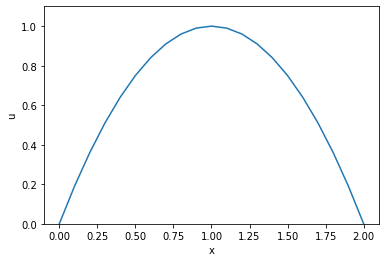

In [ ]:
plt.ylim(0, 1.1)
plt.xlabel('x'); plt.ylabel('u')
plt.plot(x_grid, u)
plt.show()

Vamos criar nossa matriz A (forward) com a função abaixo:

In [ ]:
def criar_matriz_forward(N, lbda):
  A_forward = np.diagflat([lbda for i in range(N-2)], -1) +\
    np.diagflat([(1-2*lbda) for i in range(N-1)]) +\
    np.diagflat([lbda for i in range(N-2)], 1)
  A_forward = np.around(A_forward, decimals = 15)
  return A_forward
A_forward = criar_matriz_forward(N, lbda)

A aplicação do método em si segue abaixo, bem como um plot.

In [ ]:
def forward_diff(u, A):
  v = u[1:-1]
  v_record = []
  for i in range(M):
    v_record.append(np.insert(v, [0, len(v)], 0))
    v = np.matmul(A, v)
  return v, v_record

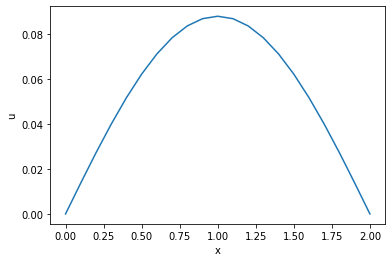

In [ ]:
v_forward, v_record = forward_diff(u, A_forward)
v_full = np.insert(v_forward, [0, len(v_forward)],0)
plt.xlabel('x'); plt.ylabel('u')
plt.plot(x_grid, v_full)

Segue um heatmap mostrando a evolução da distribuição do calor no tempo.

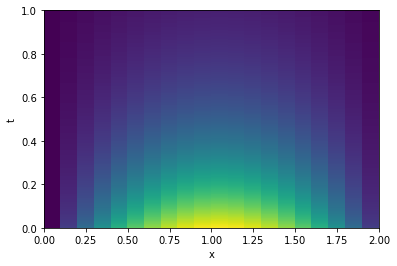

In [ ]:
fig, ax = plt.subplots()
plt.xlabel('x'); plt.ylabel('t')
heatmap = ax.pcolor(x_grid, t_grid, v_record, vmin=0., vmax=1)

Para o método backward precisamos mudar a nossa matriz A:

In [ ]:
def criar_matriz_backward(N, lbda):
  A_backward = np.diagflat([-lbda for i in range(N-2)], -1) +\
    np.diagflat([(1+2*lbda) for i in range(N-1)]) +\
    np.diagflat([-lbda for i in range(N-2)], 1)
  return A_backward
A_backward = criar_matriz_backward(N, lbda)

Segue o resto da aplicação e visualização do backward:

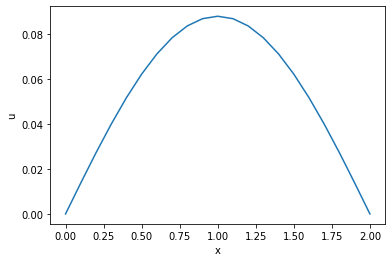

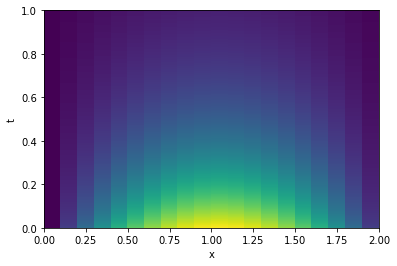

In [ ]:
def backward_diff(u, A):
  v = u[1:-1]
  v_record = []
  for i in range(M):
    v_record.append(np.insert(v, [0, len(v)], 0))
    v = np.linalg.solve(A, v)
  return v, v_record
v_backward, v_record = backward_diff(u, A_backward)

v_full = np.insert(v_backward, [0, len(v_backward)],0)
plt.xlabel('x'); plt.ylabel('u')
plt.plot(x_grid, v_full)
fig, ax = plt.subplots()
plt.xlabel('x'); plt.ylabel('t')
heatmap = ax.pcolor(x_grid, t_grid, v_record, vmin=0., vmax=1)

Criaremos agora as matrizes para o método de Crank-Nicolson:

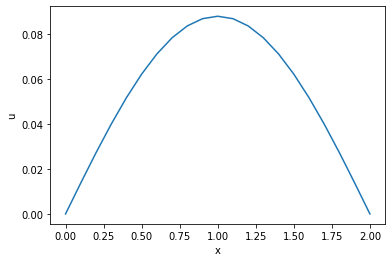

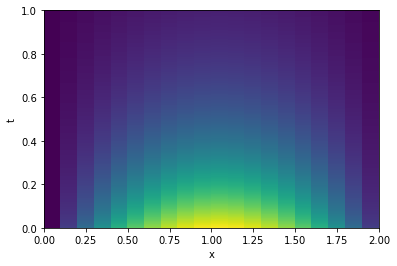

In [ ]:
def criar_matriz_CN(N, lbda):
  A_backcn = np.diagflat([-lbda/2 for i in range(N-2)], -1) +\
    np.diagflat([(1+lbda) for i in range(N-1)]) +\
    np.diagflat([-lbda/2 for i in range(N-2)], 1)
  B_forwcn = np.diagflat([lbda/2 for i in range(N-2)], -1) +\
    np.diagflat([(1-lbda) for i in range(N-1)]) +\
    np.diagflat([lbda/2 for i in range(N-2)], 1)
    
  return A_backcn, B_forwcn

A_CN, B_CN = criar_matriz_CN(N, lbda)

def cranknicolson(u, A, B):
  v = u[1:-1]
  v_record = []
  for i in range(M):
    Bv = np.matmul(B, v)
    v_record.append(np.insert(v, [0, len(v)], 0))
    v = np.linalg.solve(A, Bv)
  return v, v_record

v_cn, v_record = cranknicolson(u, A_CN, B_CN)
v_full = np.insert(v_cn, [0, len(v_cn)],0)
plt.xlabel('x'); plt.ylabel('u')
plt.plot(x_grid, v_full)
fig, ax = plt.subplots()
plt.xlabel('x'); plt.ylabel('t')
heatmap = ax.pcolor(x_grid, t_grid, v_record, vmin=0., vmax=1)


Comparando os três resultados sem os pontos de contorno:

In [ ]:
df = pd.DataFrame()
df['Forward'] = v_forward
df['Backward'] = v_backward
df['Crank-nicolson'] = v_cn
print(df)

     Forward  Backward  Crank-nicolson
0   0.013740  0.013782        0.013761
1   0.027142  0.027225        0.027183
2   0.039876  0.039997        0.039936
3   0.051628  0.051784        0.051706
4   0.062108  0.062297        0.062202
5   0.071059  0.071275        0.071167
6   0.078261  0.078498        0.078380
7   0.083535  0.083789        0.083662
8   0.086753  0.087016        0.086884
9   0.087834  0.088101        0.087967
10  0.086753  0.087016        0.086884
11  0.083535  0.083789        0.083662
12  0.078261  0.078498        0.078380
13  0.071059  0.071275        0.071167
14  0.062108  0.062297        0.062202
15  0.051628  0.051784        0.051706
16  0.039876  0.039997        0.039936
17  0.027142  0.027225        0.027183
18  0.013740  0.013782        0.013761


Para o exercício $b$ temos:
$$ \pi^2 u_t - u_{xx} = 0, \quad 0<x<1, \quad t>0  $$ com condições $$ u(0,t) = u(1, t) = 0\\ u(x, 0) = \cos{\pi(x - 0.5)}$$ com solução analítica $e^{-t}\sin{\pi x} + x(1-x)$.

In [ ]:
alpha = 1/(np.pi)
u0 = lambda x: np.cos(np.pi*(x - 0.5))
L = 1
x_grid, t_grid, lbda = discretiza(alpha, L, T, N, M)
u = u0(x_grid)
print(lbda)
print((1/np.pi**2)*2)

0.020264236728467555
0.20264236728467555


Condições Iniciais:

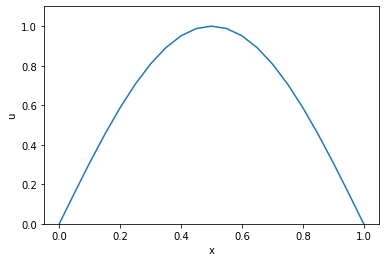

In [ ]:
plt.ylim(0, 1.1)
plt.xlabel('x'); plt.ylabel('u')
plt.plot(x_grid, u)
plt.show()

Forward

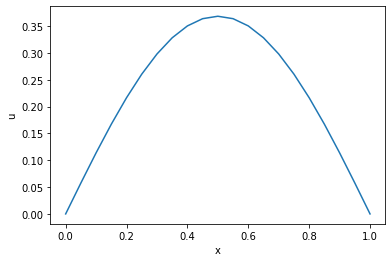

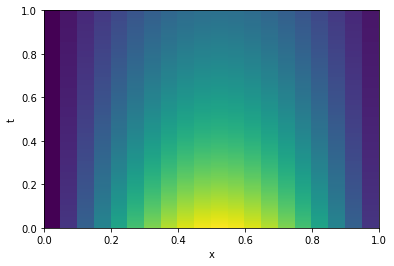

In [ ]:
A_forward = criar_matriz_forward(N, lbda)
v_forward, v_record = forward_diff(u, A_forward)
v_full = np.insert(v_forward, [0, len(v_forward)],0)
plt.xlabel('x'); plt.ylabel('u')
plt.plot(x_grid, v_full)
fig, ax = plt.subplots()
plt.xlabel('x'); plt.ylabel('t')
heatmap = ax.pcolor(x_grid, t_grid, v_record, vmin=0., vmax=1)

Backward:

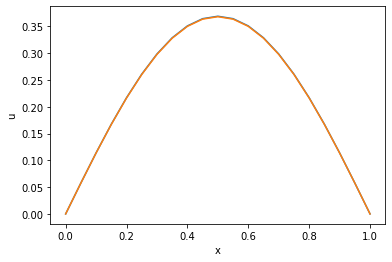

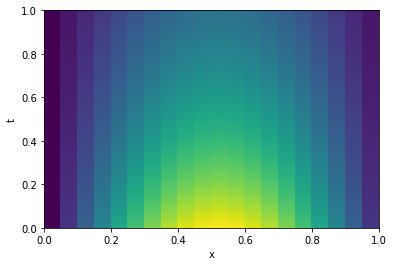

In [ ]:
A_backward = criar_matriz_backward(N, lbda)
v_backward, v_record = backward_diff(u, A_backward)

v_full = np.insert(v_backward, [0, len(v_backward)],0)
plt.xlabel('x'); plt.ylabel('u')
plt.plot(x_grid, v_full)
plt.plot(x_grid, [np.exp(-1)*np.cos(np.pi*(x-0.5)) for x in x_grid])
fig, ax = plt.subplots()
plt.xlabel('x'); plt.ylabel('t')
heatmap = ax.pcolor(x_grid, t_grid, v_record, vmin=0., vmax=1)

Crank-Nicolson:

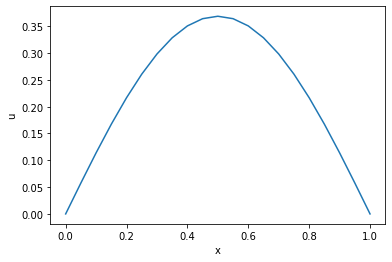

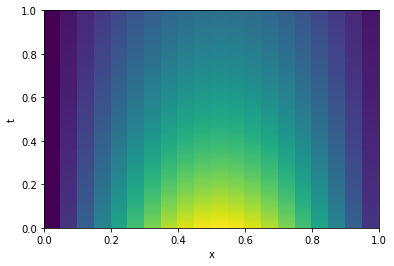

In [ ]:
A_CN, B_CN = criar_matriz_CN(N, lbda)
v_cn, v_record = cranknicolson(u, A_CN, B_CN)
v_full = np.insert(v_cn, [0, len(v_cn)],0)
plt.xlabel('x'); plt.ylabel('u')
plt.plot(x_grid, v_full)
fig, ax = plt.subplots()
plt.xlabel('x'); plt.ylabel('t')
heatmap = ax.pcolor(x_grid, t_grid, v_record, vmin=0., vmax=1)

Comparando:

In [ ]:
df = pd.DataFrame()
df['Forward'] = v_forward
df['Backward'] = v_backward
df['Crank-nicolson'] = v_cn
df['Solução Analítica'] = [np.exp(-1)*np.cos(np.pi*(x-0.5)) for x in x_grid[1:-1]]
df['dif'] = v_cn -  [np.exp(-1)*np.cos(np.pi*(x-0.5)) for x in x_grid[1:-1]]
print(df)

     Forward  Backward  Crank-nicolson  Solução Analítica       dif
0   0.057653  0.057682        0.057667           0.057549  0.000118
1   0.113886  0.113943        0.113915           0.113681  0.000234
2   0.167316  0.167399        0.167357           0.167014  0.000343
3   0.216625  0.216733        0.216679           0.216234  0.000445
4   0.260600  0.260730        0.260665           0.260130  0.000535
5   0.298159  0.298307        0.298233           0.297621  0.000612
6   0.328375  0.328539        0.328457           0.327783  0.000674
7   0.350506  0.350681        0.350594           0.349874  0.000720
8   0.364007  0.364188        0.364097           0.363350  0.000747
9   0.368544  0.368728        0.368636           0.367879  0.000757
10  0.364007  0.364188        0.364097           0.363350  0.000747
11  0.350506  0.350681        0.350594           0.349874  0.000720
12  0.328375  0.328539        0.328457           0.327783  0.000674
13  0.298159  0.298307        0.298233          

Agora temos o problema não-homogêneo: $$ u_t - u_{xx} = 2, \quad 0<x<1,\quad t>0$$ com condições:
$$u(0,t) = u(1,t) = 0\\ u(x,0) = \sin{\pi x} + x(1-x) $$ com solução analítica $u(x,t) = e^{-\pi^2 t}\sin{\pi x}$.

O algoritmo precisa ser levemente modificado para contemplar a parte não-homogênea.

In [ ]:
alpha = 1
u0 = lambda x: np.sin(np.pi * x) + x*(1-x)
L = 1
x_grid, t_grid, lbda = discretiza(alpha, L, T, N, M)
u = u0(x_grid)
g = 2

Condições Iniciais:

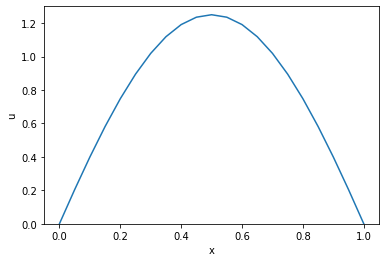

In [ ]:
plt.ylim(0, 1.3)
plt.xlabel('x'); plt.ylabel('u')
plt.plot(x_grid, u)
plt.show()

Métodos Não-Homogêneos:

In [ ]:
def forward_diff_ex3(u, A):
  v = u[1:-1]
  v_record = []
  for i in range(M):
    v_record.append(np.insert(v, [0, len(v)], 0))
    v = np.matmul(A, v) + (T/M)*2
  return v, v_record

def backward_diff_ex3(u, A):
  v = u[1:-1]
  v_record = []
  for i in range(M):
    v_record.append(np.insert(v, [0, len(v)], 0))
    v = np.linalg.solve(A, v+(T/M)*2)
  return v, v_record

def cranknicolson_ex3(u, A, B):
  v = u[1:-1]
  v_record = []
  for i in range(M):
    Bv = np.matmul(B, v)
    v_record.append(np.insert(v, [0, len(v)], 0))
    v = np.linalg.solve(A, Bv+2*(T/M))
  return v, v_record

Forward:

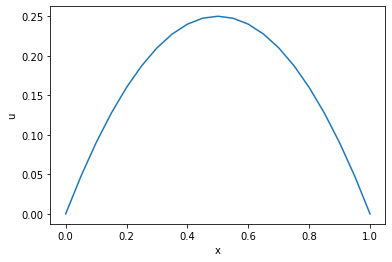

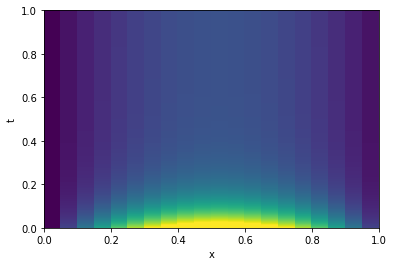

In [ ]:
A_forward = criar_matriz_forward(N, lbda)
v_forward, v_record = forward_diff_ex3(u, A_forward)
v_full = np.insert(v_forward, [0, len(v_forward)],0)
plt.xlabel('x'); plt.ylabel('u')
plt.plot(x_grid, v_full)
fig, ax = plt.subplots()
plt.xlabel('x'); plt.ylabel('t')
heatmap = ax.pcolor(x_grid, t_grid, v_record, vmin=0., vmax=1)


Backward:

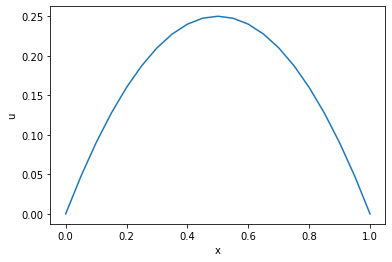

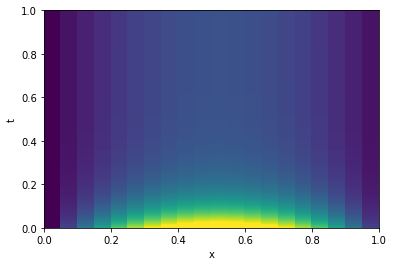

In [ ]:
A_backward = criar_matriz_backward(N, lbda)
v_backward, v_record = backward_diff_ex3(u, A_backward)
v_full = np.insert(v_forward, [0, len(v_forward)],0)
plt.xlabel('x'); plt.ylabel('u')
plt.plot(x_grid, v_full)
fig, ax = plt.subplots()
plt.xlabel('x'); plt.ylabel('t')
heatmap = ax.pcolor(x_grid, t_grid, v_record, vmin=0., vmax=1)


Crank-Nicolson

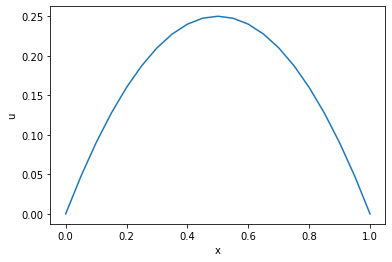

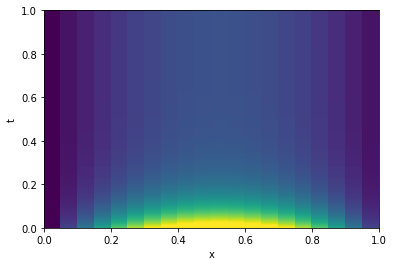

In [ ]:
A_CN, B_CN = criar_matriz_CN(N, lbda)
v_cn, v_record = cranknicolson_ex3(u, A_CN, B_CN)
v_full = np.insert(v_cn, [0, len(v_cn)],0)
plt.xlabel('x'); plt.ylabel('u')
plt.plot(x_grid, v_full)
fig, ax = plt.subplots()
plt.xlabel('x'); plt.ylabel('t')
heatmap = ax.pcolor(x_grid, t_grid, v_record, vmin=0., vmax=1)

Comparando:

In [ ]:
df = pd.DataFrame()
df['Forward'] = v_forward
df['Backward'] = v_backward
df['Crank-nicolson'] = v_cn
anal = [np.exp(-np.pi**2)*np.sin(np.pi*x)+x*(1-x) for x in x_grid[1:-1]]
df['Solução Analítica'] = anal
df['dif'] = v_cn - anal
print(df)

     Forward  Backward  Crank-nicolson  Solução Analítica           dif
0   0.047508  0.047508        0.047508           0.047508  1.655764e-07
1   0.090016  0.090017        0.090016           0.090016  3.270757e-07
2   0.127523  0.127525        0.127524           0.127523  4.805214e-07
3   0.160030  0.160032        0.160031           0.160030  6.221350e-07
4   0.187536  0.187538        0.187537           0.187537  7.484296e-07
5   0.210042  0.210044        0.210043           0.210042  8.562954e-07
6   0.227546  0.227548        0.227547           0.227546  9.430763e-07
7   0.240049  0.240051        0.240050           0.240049  1.006636e-06
8   0.247551  0.247553        0.247552           0.247551  1.045408e-06
9   0.250052  0.250054        0.250053           0.250052  1.058439e-06
10  0.247551  0.247553        0.247552           0.247551  1.045408e-06
11  0.240049  0.240051        0.240050           0.240049  1.006636e-06
12  0.227546  0.227548        0.227547           0.227546  9.430